In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
nba_players_df = pd.read_csv("all_seasons.csv")
nba_players_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [3]:
nba_players_df.nunique

<bound method DataFrame.nunique of        Unnamed: 0        player_name team_abbreviation   age  player_height  \
0               0      Dennis Rodman               CHI  36.0         198.12   
1               1  Dwayne Schintzius               LAC  28.0         215.90   
2               2       Earl Cureton               TOR  39.0         205.74   
3               3        Ed O'Bannon               DAL  24.0         203.20   
4               4        Ed Pinckney               MIA  34.0         205.74   
...           ...                ...               ...   ...            ...   
12300       12300    Markieff Morris               MIA  32.0         205.74   
12301       12301     Markelle Fultz               ORL  24.0         193.04   
12302       12302       Marcus Smart               BOS  28.0         193.04   
12303       12303     Marcus Garrett               MIA  23.0         195.58   
12304       12304       Micah Potter               DET  24.0         208.28   

       player_we

In [4]:
nba_players_df["player_name"].unique()

array(['Dennis Rodman', 'Dwayne Schintzius', 'Earl Cureton', ...,
       'Marko Simonovic', 'Marcus Garrett', 'Micah Potter'], dtype=object)

In [5]:
players_nm_df = nba_players_df ['player_name'].value_counts()
players_nm_df

Vince Carter        22
Dirk Nowitzki       21
Kevin Garnett       20
Jamal Crawford      20
Kobe Bryant         20
                    ..
JaJuan Johnson       1
Carldell Johnson     1
Derrick Byars        1
Eric Dawson          1
Micah Potter         1
Name: player_name, Length: 2463, dtype: int64

In [6]:
players_nm_df = players_nm_df[:13]
players_nm_df

Vince Carter       22
Dirk Nowitzki      21
Kevin Garnett      20
Jamal Crawford     20
Kobe Bryant        20
Jason Terry        19
Paul Pierce        19
LeBron James       19
Tim Duncan         19
Tyson Chandler     19
Carmelo Anthony    19
Udonis Haslem      19
Trevor Ariza       18
Name: player_name, dtype: int64

In [7]:
long_players = pd.DataFrame(players_nm_df)
long_players.index.name = 'Players'
long_players

,player_name
Players,
Vince Carter,22
Dirk Nowitzki,21
Kevin Garnett,20
Jamal Crawford,20
Kobe Bryant,20
Jason Terry,19
Paul Pierce,19
LeBron James,19
Tim Duncan,19


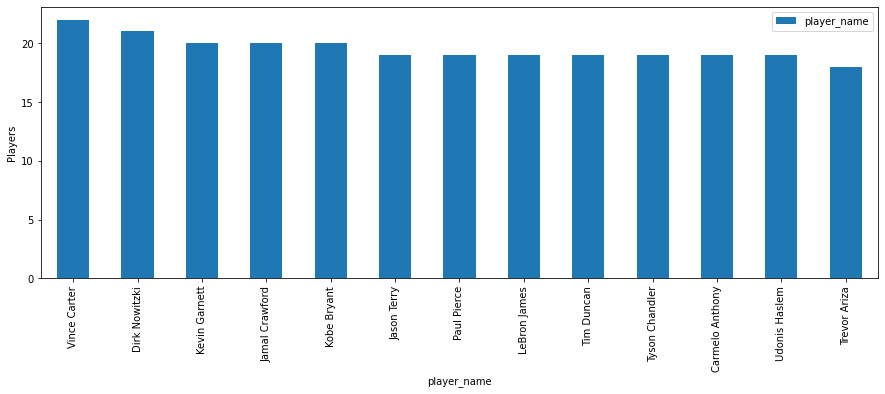

In [8]:
long_players.plot.bar(figsize=(15,5),ylabel='Players',xlabel='player_name')
plt.show()

In [9]:
nba_players_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [10]:
sa_players=nba_players_df.groupby(["team_abbreviation"])
sa_players

In [11]:
sa_players_df=nba_players_df.loc[nba_players_df["team_abbreviation"]=="SAS",:]
sa_players_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
37,37,Devin Gray,SAS,25.0,200.66,108.862080,Clemson,USA,1995,Undrafted,...,3.0,2.3,0.3,-42.1,0.113,0.250,0.263,0.319,0.071,1996-97
42,42,Dominique Wilkins,SAS,37.0,203.20,104.326160,Georgia,USA,1982,1,...,18.2,6.4,1.9,-10.3,0.101,0.154,0.297,0.517,0.118,1996-97
68,68,Jamie Feick,SAS,22.0,203.20,115.665960,Michigan State,USA,1996,2,...,3.7,5.2,0.6,-12.2,0.133,0.253,0.150,0.405,0.065,1996-97
97,97,Greg Anderson,SAS,33.0,208.28,113.398000,Houston,USA,1987,1,...,3.9,5.5,0.4,-14.2,0.109,0.219,0.106,0.531,0.033,1996-97
112,112,Avery Johnson,SAS,32.0,180.34,81.646560,Southern,USA,Undrafted,Undrafted,...,10.5,1.9,6.8,-8.6,0.015,0.058,0.175,0.517,0.353,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12194,12194,Joshua Primo,SAS,19.0,193.04,85.728888,Alabama,Canada,2021,1,...,5.8,2.3,1.6,-3.3,0.031,0.079,0.152,0.487,0.111,2021-22
12195,12195,Josh Richardson,SAS,28.0,195.58,90.718400,Tennessee,USA,2015,2,...,10.2,2.8,1.8,4.5,0.026,0.087,0.171,0.573,0.105,2021-22
12213,12213,Keldon Johnson,SAS,22.0,198.12,99.790240,Kentucky,USA,2019,1,...,17.0,6.1,2.1,2.1,0.031,0.148,0.210,0.574,0.091,2021-22
12215,12215,Keita Bates-Diop,SAS,26.0,203.20,103.872568,Ohio State,USA,2018,2,...,5.7,3.9,0.7,0.8,0.061,0.163,0.144,0.578,0.059,2021-22


In [12]:
tp_df = sa_players_df.loc[sa_players_df["player_name"]=="Tony Parker",:]
tp_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2315,2315,Tony Parker,SAS,20.0,187.96,80.285784,None,France,2001,1,...,9.2,2.6,4.3,5.8,0.017,0.082,0.177,0.497,0.237,2001-02
2952,2952,Tony Parker,SAS,21.0,187.96,81.646560,None,France,2001,1,...,15.5,2.6,5.3,8.9,0.015,0.071,0.228,0.542,0.268,2002-03
3183,3183,Tony Parker,SAS,22.0,187.96,81.646560,None,France,2001,1,...,14.7,3.2,5.5,8.4,0.019,0.085,0.224,0.516,0.278,2003-04
3617,3617,Tony Parker,SAS,23.0,187.96,80.285784,None,France,2001,1,...,16.6,3.7,6.1,9.7,0.020,0.107,0.250,0.528,0.323,2004-05
4308,4308,Tony Parker,SAS,24.0,187.96,80.285784,None,France,2001,1,...,18.9,3.3,5.8,10.6,0.017,0.093,0.270,0.584,0.311,2005-06
4789,4789,Tony Parker,SAS,25.0,187.96,81.646560,None,France,2001,1,...,18.6,3.2,5.5,10.1,0.017,0.101,0.273,0.572,0.307,2006-07
5301,5301,Tony Parker,SAS,26.0,187.96,81.646560,None,France,2001,1,...,18.8,3.2,6.0,7.6,0.016,0.095,0.283,0.542,0.327,2007-08
5454,5454,Tony Parker,SAS,27.0,187.96,81.646560,None,France,2001,1,...,22.0,3.1,6.9,6.6,0.013,0.094,0.316,0.556,0.371,2008-09
5867,5867,Tony Parker,SAS,28.0,187.96,81.646560,None,France,2001,1,...,16.0,2.4,5.7,5.8,0.005,0.084,0.258,0.542,0.304,2009-10
6341,6341,Tony Parker,SAS,29.0,187.96,83.914520,None,France,2001,1,...,17.5,3.1,6.6,6.5,0.014,0.092,0.254,0.569,0.345,2010-11


In [13]:
td_df = sa_players_df.loc[sa_players_df["player_name"]=="Tim Duncan",:]
td_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
567,567,Tim Duncan,SAS,22.0,213.36,112.490816,Wake Forest,US Virgin Islands,1997,1,...,21.1,11.9,2.7,8.0,0.108,0.238,0.262,0.577,0.131,1997-98
986,986,Tim Duncan,SAS,23.0,213.36,112.490816,Wake Forest,US Virgin Islands,1997,1,...,21.7,11.4,2.4,10.1,0.098,0.221,0.274,0.541,0.117,1998-99
1628,1628,Tim Duncan,SAS,24.0,213.36,117.933920,Wake Forest,US Virgin Islands,1997,1,...,23.2,12.4,3.2,9.5,0.109,0.244,0.286,0.555,0.152,1999-00
2137,2137,Tim Duncan,SAS,25.0,213.36,117.933920,Wake Forest,US Virgin Islands,1997,1,...,22.2,12.2,3.0,12.3,0.097,0.246,0.287,0.536,0.150,2000-01
2325,2325,Tim Duncan,SAS,26.0,213.36,117.933920,Wake Forest,US Virgin Islands,1997,1,...,25.5,12.7,3.7,8.7,0.097,0.257,0.291,0.576,0.182,2001-02
2942,2942,Tim Duncan,SAS,27.0,213.36,117.933920,Wake Forest,US Virgin Islands,1997,1,...,23.3,12.9,3.9,9.1,0.100,0.268,0.279,0.564,0.191,2002-03
3190,3190,Tim Duncan,SAS,28.0,213.36,117.933920,Wake Forest,US Virgin Islands,1997,1,...,22.3,12.4,3.1,11.3,0.103,0.276,0.300,0.534,0.170,2003-04
3568,3568,Tim Duncan,SAS,29.0,210.82,117.933920,Wake Forest,US Virgin Islands,1997,1,...,20.3,11.1,2.7,16.7,0.111,0.277,0.291,0.540,0.151,2004-05
4302,4302,Tim Duncan,SAS,30.0,210.82,117.933920,Wake Forest,US Virgin Islands,1997,1,...,18.6,11.0,3.2,9.5,0.100,0.267,0.277,0.523,0.162,2005-06
4762,4762,Tim Duncan,SAS,31.0,210.82,117.933920,Wake Forest,US Virgin Islands,1997,1,...,20.0,10.6,3.4,13.7,0.100,0.268,0.279,0.579,0.182,2006-07


In [14]:
mg_df = sa_players_df.loc[sa_players_df["player_name"]=="Manu Ginobili",:]
mg_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2976,2976,Manu Ginobili,SAS,25.0,198.12,95.25432,None,Argentina,1999,2,...,7.6,2.3,2.0,6.8,0.039,0.091,0.182,0.556,0.163,2002-03
3172,3172,Manu Ginobili,SAS,26.0,198.12,95.25432,None,Argentina,1999,2,...,12.8,4.5,3.8,8.7,0.043,0.128,0.217,0.536,0.218,2003-04
3934,3934,Manu Ginobili,SAS,27.0,198.12,92.98636,None,Argentina,1999,2,...,16.0,4.4,3.9,16.6,0.041,0.136,0.242,0.609,0.217,2004-05
4371,4371,Manu Ginobili,SAS,28.0,198.12,92.98636,None,Argentina,1999,2,...,15.1,3.5,3.6,12.1,0.028,0.122,0.245,0.593,0.215,2005-06
4691,4691,Manu Ginobili,SAS,29.0,198.12,92.98636,None,Argentina,1999,2,...,16.5,4.4,3.5,13.6,0.036,0.153,0.265,0.609,0.223,2006-07
5246,5246,Manu Ginobili,SAS,30.0,198.12,92.98636,None,Argentina,1999,2,...,19.5,4.8,4.5,8.7,0.033,0.145,0.281,0.612,0.257,2007-08
5614,5614,Manu Ginobili,SAS,31.0,198.12,92.98636,None,Argentina,1999,2,...,15.5,4.5,3.6,3.9,0.024,0.176,0.265,0.594,0.230,2008-09
6117,6117,Manu Ginobili,SAS,32.0,198.12,92.98636,None,Argentina,1999,2,...,16.5,3.8,4.9,7.9,0.038,0.119,0.253,0.584,0.273,2009-10
6562,6562,Manu Ginobili,SAS,33.0,198.12,92.98636,None,Argentina,1999,2,...,17.4,3.7,4.9,11.5,0.021,0.117,0.256,0.581,0.249,2010-11
7102,7102,Manu Ginobili,SAS,34.0,198.12,92.98636,None,Argentina,1999,2,...,12.9,3.4,4.4,16.1,0.029,0.138,0.225,0.668,0.270,2011-12


In [15]:
aj_df = sa_players_df.loc[sa_players_df["player_name"]=="Avery Johnson",:]
aj_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
112,112,Avery Johnson,SAS,32.0,180.34,81.64656,Southern,USA,Undrafted,Undrafted,...,10.5,1.9,6.8,-8.6,0.015,0.058,0.175,0.517,0.353,1996-97
736,736,Avery Johnson,SAS,33.0,180.34,81.64656,Southern,USA,Undrafted,Undrafted,...,10.2,2.0,7.9,5.6,0.014,0.048,0.158,0.514,0.351,1997-98
908,908,Avery Johnson,SAS,34.0,180.34,81.64656,Southern,USA,Undrafted,Undrafted,...,9.7,2.4,7.4,9.7,0.016,0.061,0.171,0.487,0.362,1998-99
1435,1435,Avery Johnson,SAS,35.0,180.34,81.64656,Southern,USA,Undrafted,Undrafted,...,11.2,1.9,6.0,6.3,0.015,0.053,0.192,0.500,0.319,1999-00
1887,1887,Avery Johnson,SAS,36.0,180.34,81.64656,Southern,USA,Undrafted,Undrafted,...,5.6,1.5,4.3,8.1,0.020,0.054,0.144,0.475,0.302,2000-01


In [16]:
dm_df = sa_players_df.loc[sa_players_df["player_name"]=="Dejounte Murray",:]
dm_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9365,9365,Dejounte Murray,SAS,20.0,195.58,77.11064,Washington,USA,2016,1,...,3.4,1.1,1.3,2.9,0.023,0.117,0.241,0.503,0.236,2016-17
9626,9626,Dejounte Murray,SAS,21.0,195.58,77.11064,Washington,USA,2016,1,...,8.1,5.7,2.9,4.3,0.061,0.196,0.201,0.485,0.202,2017-18
10946,10946,Dejounte Murray,SAS,23.0,193.04,81.64656,Washington,USA,2016,1,...,10.9,5.8,4.1,-4.2,0.040,0.184,0.207,0.524,0.232,2019-20
11663,11663,Dejounte Murray,SAS,24.0,193.04,81.64656,Washington,USA,2016,1,...,15.7,7.1,5.4,2.3,0.026,0.190,0.231,0.509,0.246,2020-21
11955,11955,Dejounte Murray,SAS,25.0,193.04,81.64656,Washington,USA,2016,1,...,21.1,8.3,9.2,1.9,0.031,0.196,0.268,0.533,0.388,2021-22


In [17]:
lw_df = sa_players_df.loc[sa_players_df["player_name"]=="Lonnie Walker IV",:]
lw_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10446,10446,Lonnie Walker IV,SAS,20.0,195.58,92.986360,Miami,USA,2018,1,...,2.6,1.0,0.5,-24.3,0.000,0.122,0.196,0.446,0.143,2018-19
10733,10733,Lonnie Walker IV,SAS,21.0,195.58,92.532768,Miami,USA,2018,1,...,6.4,2.3,1.1,-0.4,0.023,0.110,0.183,0.507,0.099,2019-20
11165,11165,Lonnie Walker IV,SAS,22.0,193.04,92.532768,Miami,USA,2018,1,...,11.2,2.6,1.7,-6.3,0.009,0.093,0.199,0.523,0.095,2020-21
12266,12266,Lonnie Walker IV,SAS,23.0,193.04,92.532768,Miami,USA,2018,1,...,12.1,2.6,2.2,-3.0,0.010,0.095,0.232,0.512,0.137,2021-22


In [18]:
dr_df = sa_players_df.loc[sa_players_df["player_name"]=="David Robinson",:]
dr_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
186,186,David Robinson,SAS,31.0,215.9,106.59412,Navy,USA,1987,1,...,17.7,8.5,1.3,9.6,0.161,0.237,0.334,0.559,0.111,1996-97
720,720,David Robinson,SAS,32.0,215.9,113.39800,Navy,USA,1987,1,...,21.6,10.6,2.7,7.7,0.121,0.231,0.297,0.581,0.159,1997-98
1044,1044,David Robinson,SAS,33.0,215.9,113.39800,Navy,USA,1987,1,...,15.8,10.0,2.1,11.2,0.113,0.235,0.240,0.564,0.120,1998-99
1427,1427,David Robinson,SAS,34.0,215.9,113.39800,Navy,USA,1987,1,...,17.8,9.6,1.8,8.5,0.091,0.251,0.260,0.568,0.101,1999-00
1798,1798,David Robinson,SAS,35.0,215.9,113.39800,Navy,USA,1987,1,...,14.4,8.6,1.5,13.2,0.102,0.216,0.227,0.559,0.087,2000-01
2448,2448,David Robinson,SAS,36.0,215.9,113.39800,Navy,USA,1987,1,...,12.2,8.3,1.2,9.9,0.100,0.220,0.193,0.562,0.068,2001-02
2819,2819,David Robinson,SAS,37.0,215.9,113.39800,Navy,USA,1987,1,...,8.5,7.9,1.0,11.2,0.118,0.220,0.167,0.531,0.057,2002-03


In [19]:
dr_mn=sa_players_df.groupby(["player_name"]).mean()["pts"]
dr_med=sa_players_df.groupby(["player_name"]).median()["pts"]
dr_var=sa_players_df.groupby(["player_name"]).var()["pts"]
dr_std=sa_players_df.groupby(["player_name"]).std()["pts"]
dr_sum=pd.DataFrame({"Mean": dr_mn, "Median": dr_med, "Variance":dr_var, "Standard": dr_std})
dr_sum

,Mean,Median,Variance,Standard
player_name,,,,
Alex Garcia,1.500000,1.5,NaN,NaN
Alex Scales,0.000000,0.0,NaN,NaN
Amal McCaskill,1.900000,1.9,NaN,NaN
Andre Miller,3.700000,3.7,NaN,NaN
Andrew Gaze,1.100000,1.1,NaN,NaN
...,...,...,...,...
Vernon Maxwell,12.900000,12.9,NaN,NaN
Vinny Del Negro,10.900000,10.9,3.920000,1.979899
Will Perdue,5.366667,5.0,10.023333,3.165965


In [20]:
tpp_df=sa_players_df.loc[sa_players_df["player_name"]=="Tony Parker",:]
tpp_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2315,2315,Tony Parker,SAS,20.0,187.96,80.285784,None,France,2001,1,...,9.2,2.6,4.3,5.8,0.017,0.082,0.177,0.497,0.237,2001-02
2952,2952,Tony Parker,SAS,21.0,187.96,81.646560,None,France,2001,1,...,15.5,2.6,5.3,8.9,0.015,0.071,0.228,0.542,0.268,2002-03
3183,3183,Tony Parker,SAS,22.0,187.96,81.646560,None,France,2001,1,...,14.7,3.2,5.5,8.4,0.019,0.085,0.224,0.516,0.278,2003-04
3617,3617,Tony Parker,SAS,23.0,187.96,80.285784,None,France,2001,1,...,16.6,3.7,6.1,9.7,0.020,0.107,0.250,0.528,0.323,2004-05
4308,4308,Tony Parker,SAS,24.0,187.96,80.285784,None,France,2001,1,...,18.9,3.3,5.8,10.6,0.017,0.093,0.270,0.584,0.311,2005-06
4789,4789,Tony Parker,SAS,25.0,187.96,81.646560,None,France,2001,1,...,18.6,3.2,5.5,10.1,0.017,0.101,0.273,0.572,0.307,2006-07
5301,5301,Tony Parker,SAS,26.0,187.96,81.646560,None,France,2001,1,...,18.8,3.2,6.0,7.6,0.016,0.095,0.283,0.542,0.327,2007-08
5454,5454,Tony Parker,SAS,27.0,187.96,81.646560,None,France,2001,1,...,22.0,3.1,6.9,6.6,0.013,0.094,0.316,0.556,0.371,2008-09
5867,5867,Tony Parker,SAS,28.0,187.96,81.646560,None,France,2001,1,...,16.0,2.4,5.7,5.8,0.005,0.084,0.258,0.542,0.304,2009-10
6341,6341,Tony Parker,SAS,29.0,187.96,83.914520,None,France,2001,1,...,17.5,3.1,6.6,6.5,0.014,0.092,0.254,0.569,0.345,2010-11


In [21]:
tpp_df.nunique

<bound method DataFrame.nunique of       Unnamed: 0  player_name team_abbreviation   age  player_height  \
2315        2315  Tony Parker               SAS  20.0         187.96   
2952        2952  Tony Parker               SAS  21.0         187.96   
3183        3183  Tony Parker               SAS  22.0         187.96   
3617        3617  Tony Parker               SAS  23.0         187.96   
4308        4308  Tony Parker               SAS  24.0         187.96   
4789        4789  Tony Parker               SAS  25.0         187.96   
5301        5301  Tony Parker               SAS  26.0         187.96   
5454        5454  Tony Parker               SAS  27.0         187.96   
5867        5867  Tony Parker               SAS  28.0         187.96   
6341        6341  Tony Parker               SAS  29.0         187.96   
6984        6984  Tony Parker               SAS  30.0         187.96   
7254        7254  Tony Parker               SAS  31.0         187.96   
7760        7760  Tony Parker

In [22]:
pts_avg = tpp_df["pts"].mean()
pts_avg

15.717647058823532

In [23]:
ast_avg = tpp_df["ast_pct"].mean()
ast_avg

0.3124117647058823

In [24]:
td_pts = td_df["pts"].mean()
td_pts

18.889473684210525

In [25]:
td_ast = td_df["ast_pct"].mean()
td_ast

0.15889473684210523

In [26]:
mg_pts = mg_df["pts"].mean()
mg_pts

13.150000000000002

In [27]:
mg_ast = mg_df["ast_pct"].mean()
mg_ast

0.2383125

In [28]:
tp_reb = tpp_df["reb"].mean()
tp_reb

2.7294117647058824

In [29]:
td_reb = td_df["reb"].mean()
td_reb

10.76842105263158

In [30]:
mg_reb = mg_df["reb"].mean()
mg_reb

3.48125

In [31]:
aj_pts = aj_df["pts"].mean()
aj_pts

9.44

In [32]:
aj_ast = aj_df["ast_pct"].mean()
aj_ast

0.3374

In [33]:
aj_reb = aj_df["reb"].mean()
aj_reb

1.94

In [34]:
dm_pts = dm_df["pts"].mean()
dm_pts

11.84

In [35]:
dm_ast = dm_df["ast_pct"].mean()
dm_ast

0.2608

In [36]:
dm_reb = dm_df["reb"].mean()
dm_reb

5.6000000000000005

In [37]:
tp_med_pts = tpp_df["pts"].median()
tp_med_pts

16.6

In [38]:
td_med = td_df["pts"].median()
td_med

19.3

In [39]:
mg_med = mg_df["pts"].median()
mg_med

12.850000000000001

In [40]:
aj_med = aj_df["pts"].median()
aj_med

10.2

In [41]:
dm_med = dm_df["pts"].median()
dm_med

10.9

In [43]:
jp_df=sa_players_df.loc[sa_players_df["player_name"]=="Joshua Primo",:]
jp_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12194,12194,Joshua Primo,SAS,19.0,193.04,85.728888,Alabama,Canada,2021,1,...,5.8,2.3,1.6,-3.3,0.031,0.079,0.152,0.487,0.111,2021-22


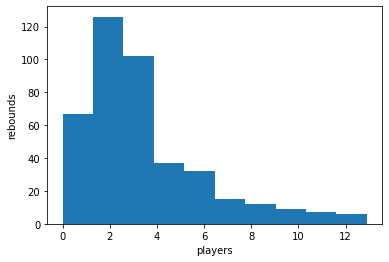

In [44]:
plt.hist(sa_players_df["reb"])
plt.xlabel("players")
plt.ylabel("rebounds")
plt.show()

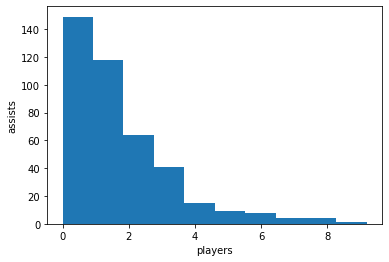

In [45]:
plt.hist(sa_players_df["ast"])
plt.xlabel("players")
plt.ylabel("assists")
plt.show()

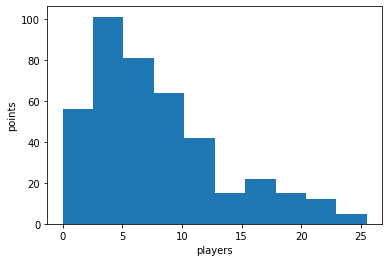

In [46]:
plt.hist(sa_players_df["pts"])
plt.xlabel("players")
plt.ylabel("points")
plt.show()

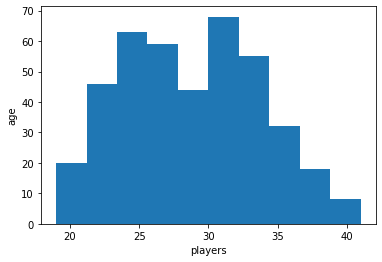

In [47]:
plt.hist(sa_players_df["age"])
plt.xlabel("players")
plt.ylabel("age")
plt.show()

In [48]:
kj_df=sa_players_df.loc[sa_players_df["player_name"]=="Keldon Johnson",:]
kj_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10702,10702,Keldon Johnson,SAS,20.0,195.58,99.79024,Kentucky,USA,2019,1,...,9.1,3.4,0.9,11.3,0.033,0.146,0.164,0.711,0.066,2019-20
11277,11277,Keldon Johnson,SAS,21.0,195.58,99.79024,Kentucky,USA,2019,1,...,12.8,6.0,1.8,-3.8,0.045,0.163,0.189,0.557,0.087,2020-21
12213,12213,Keldon Johnson,SAS,22.0,198.12,99.79024,Kentucky,USA,2019,1,...,17.0,6.1,2.1,2.1,0.031,0.148,0.210,0.574,0.091,2021-22


In [49]:
bd_df=sa_players_df.loc[sa_players_df["player_name"]=="Boris Diaw",:]
bd_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
6753,6753,Boris Diaw,SAS,30.0,203.2,106.59412,None,France,2003,1,...,6.4,4.9,3.6,-5.9,0.054,0.167,0.154,0.498,0.224,2011-12
7514,7514,Boris Diaw,SAS,31.0,203.2,106.59412,None,France,2003,1,...,5.8,3.4,2.4,4.9,0.048,0.124,0.121,0.603,0.152,2012-13
7645,7645,Boris Diaw,SAS,32.0,203.2,113.39800,None,France,2003,1,...,9.1,4.1,2.8,8.0,0.045,0.140,0.171,0.578,0.162,2013-14
8477,8477,Boris Diaw,SAS,33.0,203.2,113.39800,None,France,2003,1,...,8.7,4.3,2.9,6.7,0.046,0.153,0.183,0.526,0.181,2014-15
9014,9014,Boris Diaw,SAS,34.0,203.2,113.39800,None,France,2003,1,...,6.4,3.1,2.3,10.8,0.049,0.139,0.168,0.582,0.182,2015-16


In [50]:
dg_df=sa_players_df.loc[sa_players_df["player_name"]=="Danny Green",:]
dg_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
6313,6313,Danny Green,SAS,24.0,198.12,95.25432,North Carolina,USA,2009,2,...,5.1,1.9,0.3,12.8,0.037,0.156,0.203,0.586,0.039,2010-11
6860,6860,Danny Green,SAS,25.0,198.12,95.25432,North Carolina,USA,2009,2,...,9.1,3.5,1.3,8.4,0.040,0.128,0.174,0.579,0.086,2011-12
7571,7571,Danny Green,SAS,26.0,198.12,95.25432,North Carolina,USA,2009,2,...,10.5,3.1,1.8,7.8,0.020,0.103,0.168,0.600,0.095,2012-13
7688,7688,Danny Green,SAS,27.0,198.12,97.52228,North Carolina,USA,2009,2,...,9.1,3.4,1.5,9.8,0.017,0.130,0.165,0.580,0.092,2013-14
8592,8592,Danny Green,SAS,28.0,198.12,97.52228,North Carolina,USA,2009,2,...,11.7,4.2,2.0,9.9,0.027,0.138,0.175,0.596,0.101,2014-15
9036,9036,Danny Green,SAS,29.0,198.12,97.52228,North Carolina,USA,2009,2,...,7.2,3.8,1.8,12.7,0.026,0.134,0.145,0.492,0.092,2015-16
9322,9322,Danny Green,SAS,30.0,198.12,97.52228,North Carolina,USA,2009,2,...,7.3,3.3,1.8,7.8,0.020,0.116,0.137,0.537,0.097,2016-17
9680,9680,Danny Green,SAS,31.0,198.12,97.52228,North Carolina,USA,2009,2,...,8.6,3.6,1.6,2.4,0.022,0.115,0.163,0.509,0.089,2017-18
